<a href="https://colab.research.google.com/github/StratosFair/DNN_Classifiers_Fast_Rates/blob/main/cifar_10_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset
import numpy as np

# CIFAR-10 Classes
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define transforms to convert images into tensors
cifar_transform = transforms.Compose([
    transforms.ToTensor()
])

# Load CIFAR-10 dataset
cifar_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=cifar_transform)
cifar_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=cifar_transform)

# Filter for cat (class 3) and dog (class 5)
indices_cat = [i for i, (_, label) in enumerate(cifar_train) if label == 3]
indices_dog = [i for i, (_, label) in enumerate(cifar_train) if label == 5]

# Randomly select 3 images of each class
np.random.seed(42)  # For reproducibility
chosen_cats = np.random.choice(indices_cat, 3, replace=False)
chosen_dogs = np.random.choice(indices_dog, 3, replace=False)

# Create subsets of the selected images
data_cat = Subset(cifar_train, chosen_cats)
data_dog = Subset(cifar_train, chosen_dogs)

# Convert the images into tensors for easy manipulation
cats = torch.stack([data_cat[i][0] for i in range(len(data_cat))])
dogs = torch.stack([data_dog[i][0] for i in range(len(data_dog))])

# Verify shapes
print(f"Cat images shape: {cats.shape}, Dog images shape: {dogs.shape}")

100%|██████████| 170M/170M [00:02<00:00, 78.4MB/s]


Cat images shape: torch.Size([3, 3, 32, 32]), Dog images shape: torch.Size([3, 3, 32, 32])


In [2]:
# Interpolation function
def interpolate_images(image1, image2, alpha):
    """
    Interpolate between two images given an alpha parameter.
    """
    return (1 - alpha) * image1 + alpha * image2

In [3]:
# Define interpolation steps
alphas = np.linspace(0, 1, 8)  # 8 interpolation steps (from 0 to 1)

# Generate interpolations
interpolations = []

for i in range(3):  # For each pair of cat and dog images
    row = []
    for alpha in alphas:
        interpolated_image = interpolate_images(cats[i], dogs[i], alpha)
        row.append(interpolated_image)
    interpolations.append(row)

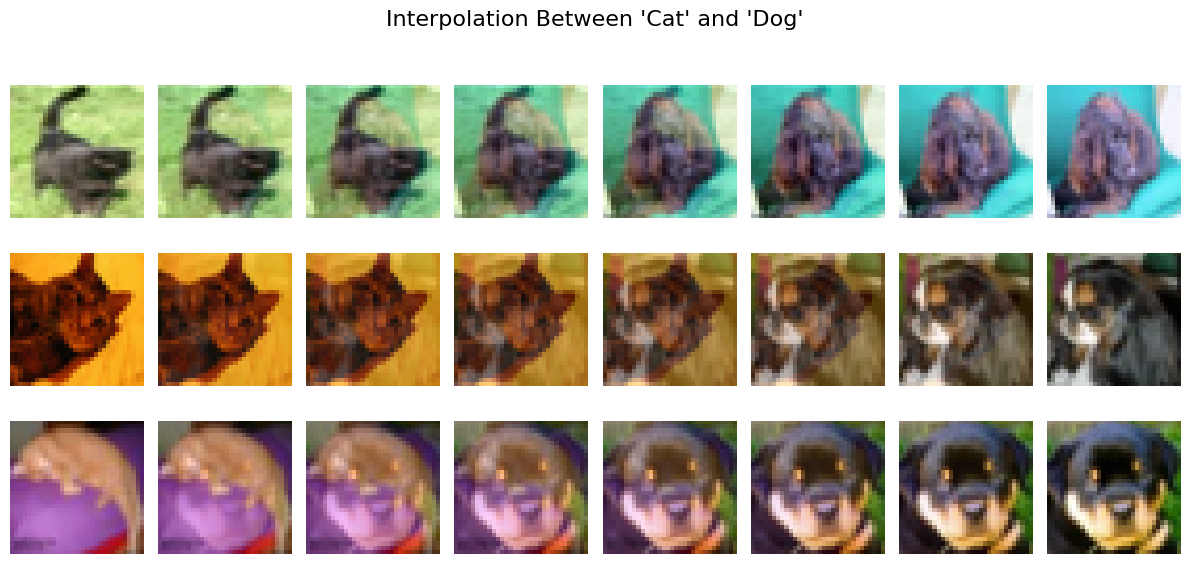

In [4]:
import matplotlib.pyplot as plt

# Plot interpolations
fig, axes = plt.subplots(3, 8, figsize=(12, 6))  # 3 rows, 8 columns
fig.suptitle("Interpolation Between 'Cat' and 'Dog'", fontsize=16)

for row_idx, row in enumerate(interpolations):
    for col_idx, image in enumerate(row):
        # Convert the image back to [0, 1] range for visualization
        img = image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
        axes[row_idx, col_idx].imshow(img)
        axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()